# Cardiovascular Disease Dataset — Exploratory Data Analysis

This notebook performs exploratory data analysis (EDA) on the **combined UCI Heart Disease dataset** (`combined_uci_heart`), which merges the Cleveland, Hungarian, Switzerland, and VA subsets.


In [1]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Inline plots
%matplotlib inline

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("deep")

# Use the combined dataset
dataset_name = "combined_uci_heart"

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
PROCESSED_DIR = os.path.join(BASE_DIR, "data", "processed")

X_path = os.path.join(PROCESSED_DIR, f"{dataset_name}_X.joblib")
y_path = os.path.join(PROCESSED_DIR, f"{dataset_name}_y.joblib")

print("Base dir:", BASE_DIR)
print("Loading:", X_path)
X = joblib.load(X_path)
y = joblib.load(y_path)
print(f"✅ Loaded dataset: {dataset_name}")
print(f"X shape: {X.shape}, y shape: {y.shape}")


Base dir: c:\Users\user\CardioVescular_Disease_prediction
Loading: c:\Users\user\CardioVescular_Disease_prediction\data\processed\combined_uci_heart_X.joblib
✅ Loaded dataset: combined_uci_heart
X shape: (299, 13), y shape: (299,)


## Convert to DataFrame

The preprocessed features may be stored as a sparse matrix. We convert them to a dense NumPy array (the dataset is small enough) and then to a pandas DataFrame for easier inspection.


In [2]:
# Convert to dense if needed
if hasattr(X, "toarray"):
    X_dense = X.toarray()
else:
    X_dense = X

df = pd.DataFrame(X_dense)
df["target"] = y.values if hasattr(y, "values") else y

df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,0.940446,0.687682,-2.248290,0.749760,-0.262867,2.439977,1.016910,0.029124,-0.703562,1.069475,2.264299,-0.718306,0.647243,0
1,1.384143,0.687682,0.868737,1.596354,0.747722,-0.409840,1.016910,-1.790447,1.421338,0.380309,0.640737,2.487269,-0.900962,1
2,1.384143,0.687682,0.868737,-0.661231,-0.339138,-0.409840,1.016910,-0.880662,1.421338,1.327912,0.640737,1.418744,1.163311,1
3,-1.943588,0.687682,-0.170272,-0.096835,0.061285,-0.409840,-0.996706,1.632079,-0.703562,2.103224,2.264299,-0.718306,-0.900962,0
4,-1.499891,-1.454161,-1.209281,-0.096835,-0.815830,-0.409840,1.016910,0.982232,-0.703562,0.294163,-0.982825,-0.718306,-0.900962,0


## Basic Summary Statistics


In [3]:
print("Shape:", df.shape)
display(df.describe().T)
print("\nMissing values per column:")
display(df.isnull().sum())


Shape: (299, 14)


,count,mean,std,min,25%,50%,75%,max
0,299.0,1.158494e-16,1.001676,-2.830983,-0.723420,0.163975,0.718597,2.493387
1,299.0,1.782298e-17,1.001676,-1.454161,-1.454161,0.687682,0.687682,0.687682
2,299.0,-1.633773e-16,1.001676,-2.248290,-0.170272,-0.170272,0.868737,0.868737
3,299.0,-5.940993e-17,1.001676,-2.128661,-0.661231,-0.096835,0.467562,3.853939
4,299.0,2.643742e-16,1.001676,-2.798873,-0.682356,-0.091257,0.547511,6.048548
5,299.0,-5.940993e-18,1.001676,-0.409840,-0.409840,-0.409840,-0.409840,2.439977
6,299.0,1.188199e-17,1.001676,-0.996706,-0.996706,0.010102,1.016910,1.016910
7,299.0,1.307018e-16,1.001676,-3.393403,-0.729031,0.115770,0.700632,2.281926
8,299.0,6.089518e-17,1.001676,-0.703562,-0.703562,-0.703562,1.421338,1.421338
9,299.0,-7.129191e-17,1.001676,-0.911877,-0.911877,-0.222711,0.466455,4.429159



Missing values per column:


0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
target    0
dtype: int64

## Target Class Distribution


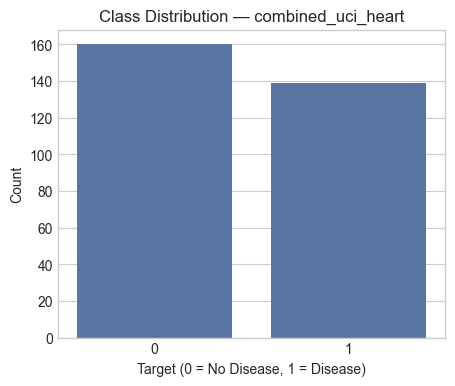

Class proportions:
target
0    0.535117
1    0.464883
Name: proportion, dtype: float64


In [4]:
plt.figure(figsize=(5, 4))
sns.countplot(x=df["target"])
plt.title(f"Class Distribution — {dataset_name}")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()

class_counts = df["target"].value_counts(normalize=True)
print("Class proportions:")
print(class_counts)


## Correlation Heatmap

Although feature names are generic here (0, 1, 2, ...), this still provides a sense of redundancy and clusters in the feature space.


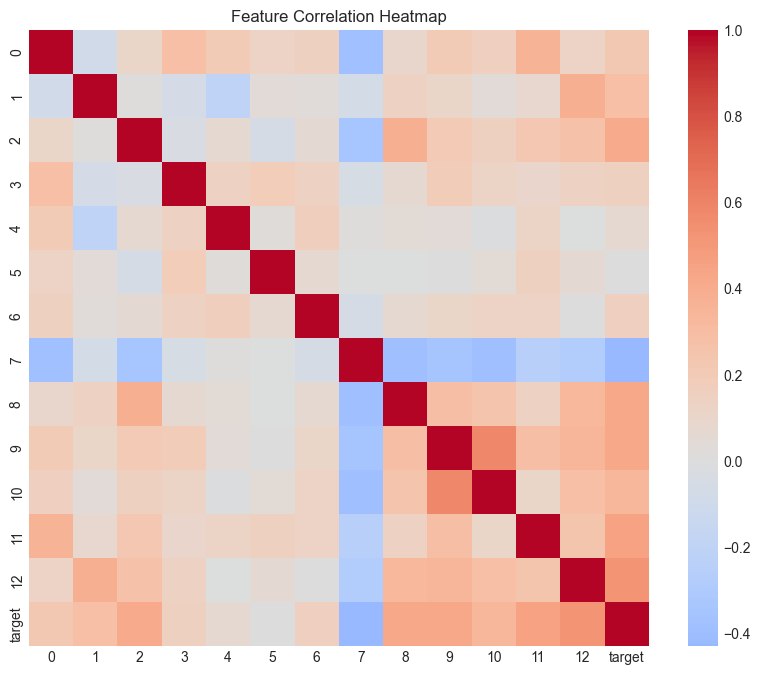

In [5]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


## Pairwise Relationships (First Few Features)


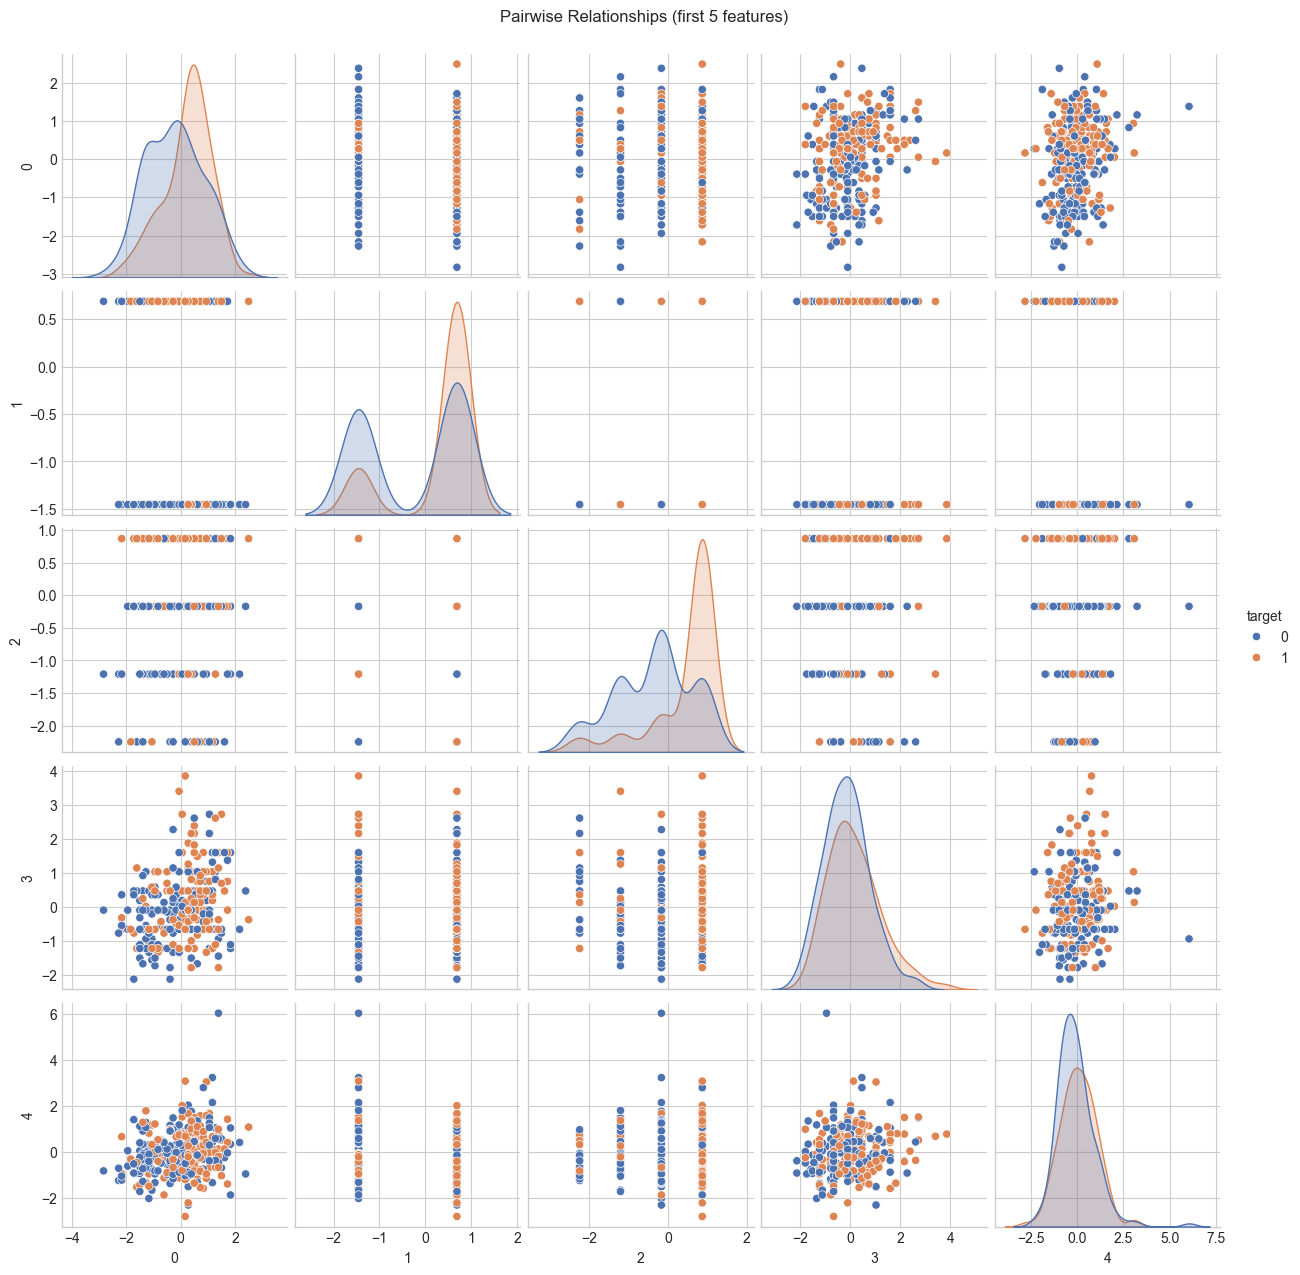

In [6]:
subset_cols = df.columns[:5].tolist() + ["target"]
sns.pairplot(df[subset_cols], hue="target", diag_kind="kde")
plt.suptitle("Pairwise Relationships (first 5 features)", y=1.02)
plt.show()


## Feature Distributions


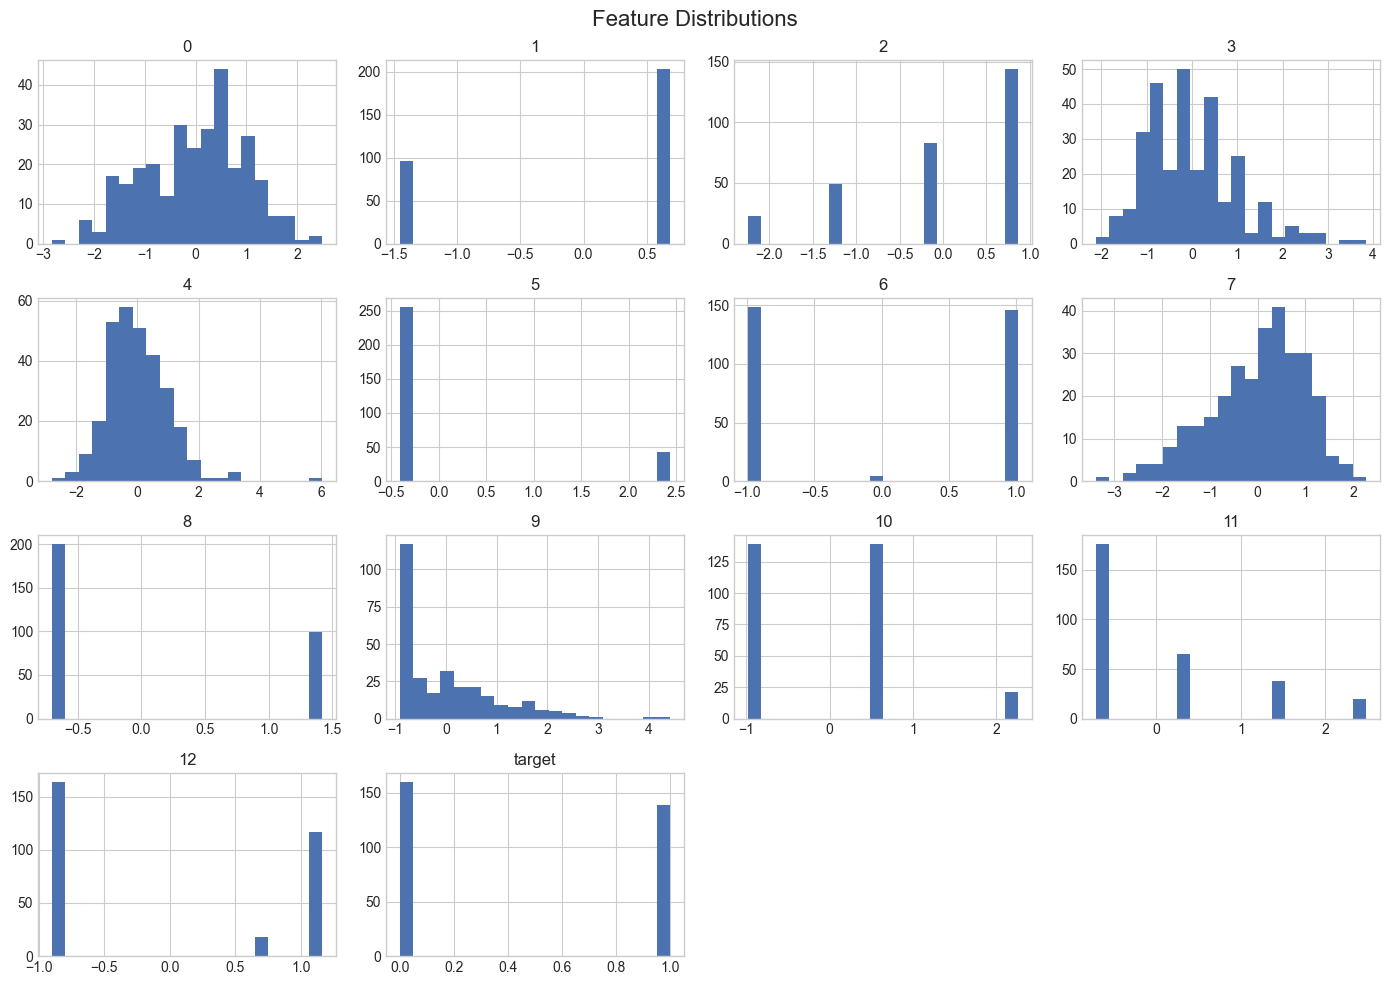

In [7]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].hist(bins=20, figsize=(14, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()
